# Loan Application Status Prediction

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls = pd.read_csv('Loan_prediction.csv')

In [3]:
ls.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


so we have successfully loaded the dataset

In [4]:
ls.shape

(614, 13)

so we have dataset with 614 nos of Rows and 13 nos of columns

In [5]:
ls.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

we have object, float and int datatype columns in the dataset

in dependent column we have numeric data but it is showing as object data type we need to convert it first

In [6]:
ls['Dependents'] = ls['Dependents'].str.replace('[^0-9]', '', regex=True)
ls['Dependents'] = pd.to_numeric(ls['Dependents'], errors='coerce', downcast='integer')

print(ls.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<Axes: >

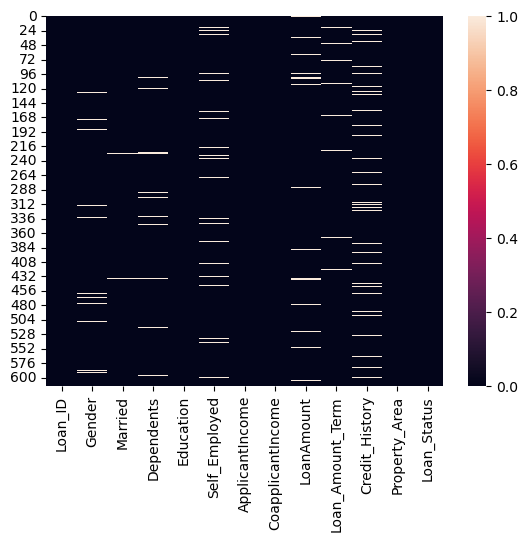

In [7]:
print(ls.isnull().sum())
sns.heatmap(ls.isnull())

So we have null values in the dataset. We need to treat them using fillna method

replacing null values in catergorical columns with mode value

In [8]:
ls['Gender'].fillna(ls['Gender'].mode()[0],inplace = True)
ls['Married'].fillna(ls['Married'].mode()[0],inplace = True)
ls['Self_Employed'].fillna(ls['Self_Employed'].mode()[0],inplace = True)

replacing null values in numerical columns with mean value

In [9]:
ls['Dependents'].fillna(ls['Dependents'].mean(),inplace = True)
ls['LoanAmount'].fillna(ls['LoanAmount'].mean(),inplace = True)
ls['Loan_Amount_Term'].fillna(ls['Loan_Amount_Term'].mean(),inplace = True)
ls['Credit_History'].fillna(ls['Credit_History'].mean(),inplace = True)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

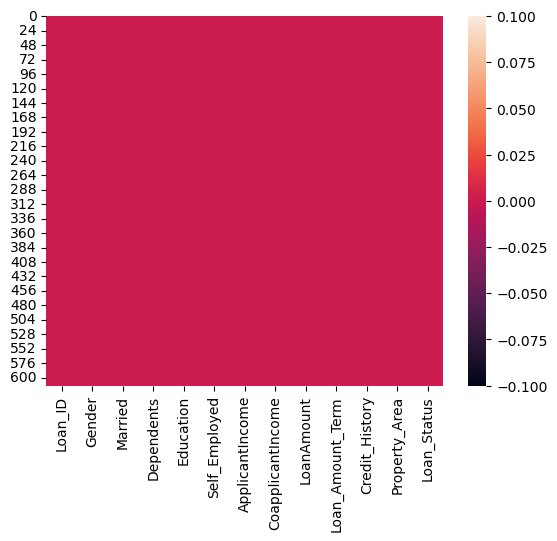

In [10]:
print(ls.isnull().sum())
sns.heatmap(ls.isnull())

we have replaced the null values with mean and mode values of their respected data types

In [11]:
for i in ls:
    print(ls[i].value_counts())
    print('\n')
    print('No of unique values in',i,':', ls[i].nunique())
    print('\n')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


No of unique values in Loan_ID : 614


Male      502
Female    112
Name: Gender, dtype: int64


No of unique values in Gender : 2


Yes    401
No     213
Name: Married, dtype: int64


No of unique values in Married : 2


0.000000    345
1.000000    102
2.000000    101
3.000000     51
0.762938     15
Name: Dependents, dtype: int64


No of unique values in Dependents : 5


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No of unique values in Education : 2


No     532
Yes     82
Name: Self_Employed, dtype: int64


No of unique values in Self_Employed : 2


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


No of unique values in ApplicantIncome : 505


0.0      

here we can see that no of values are repeated in each column and no of unique values present in each column

In Loan_ID column we have total 614 nos of unique values that means this column will not be providing any importance to prediction, so this column can be dropped 

In [12]:
ls.drop('Loan_ID',axis = 1, inplace = True)

In [13]:
ls.shape

(614, 12)

we have have dropped the Loan_ID column

now we have 12 nos of columns

In [14]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


here we can check for null values, no of Rows and Columns in the dataset, data types and memory usage by dataset which is 57.7+ KB

In [15]:
ls.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,1.002718,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


so here we can see mean and median values whether the columns having skewness or normal distribution 

there is a huge value difference in 3rd IQR and max in ApplicantIncome, CoApplicantIncome, LoanAmount columns

# Univariate Analysis

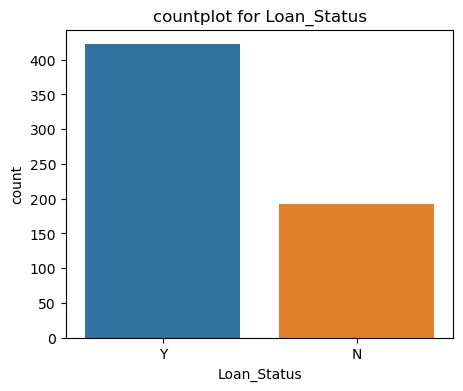

In [16]:
plt.figure(figsize = (5,4))
sns.countplot(x=ls['Loan_Status'])
plt.title('countplot for Loan_Status')
plt.show()

here in loan status applicants who are eligible for loan are higher than non eligible applicants

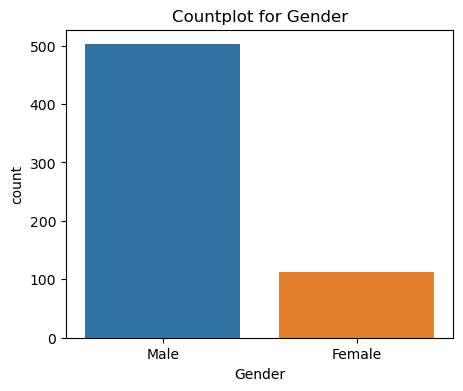

In [17]:
plt.figure(figsize = (5,4))
sns.countplot(x=ls['Gender'])
plt.title('Countplot for Gender')
plt.show()

in Gender column Male count is higher than Female

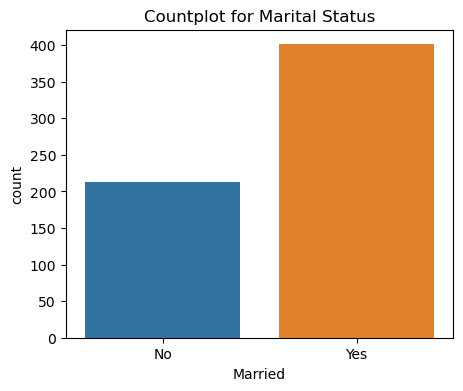

In [18]:
plt.figure(figsize = (5,4))
sns.countplot(x=ls['Married'])
plt.title('Countplot for Marital Status')
plt.show()

married people are higher compared to unmarried people

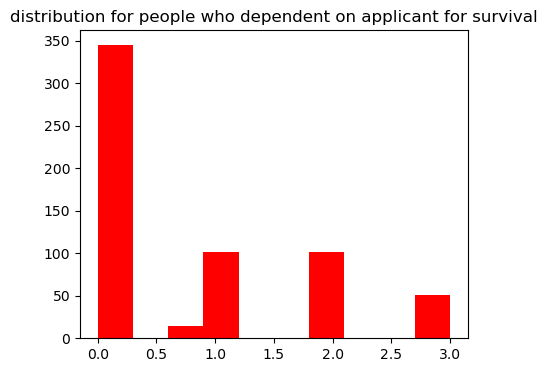

In [19]:
plt.figure(figsize = (5,4))
plt.hist(ls['Dependents'], color = 'red')
plt.title('distribution for people who dependent on applicant for survival')
plt.show()

people are less dependent on applicant for surviaval compared to people who are not dependent

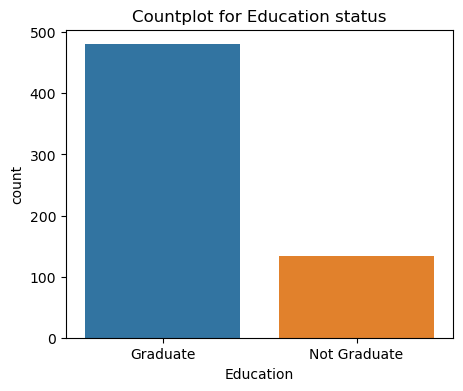

In [20]:
plt.figure(figsize = (5,4))
sns.countplot(x=ls['Education'])
plt.title('Countplot for Education status')
plt.show()

Graduated applicants are higher than not graduated applicants

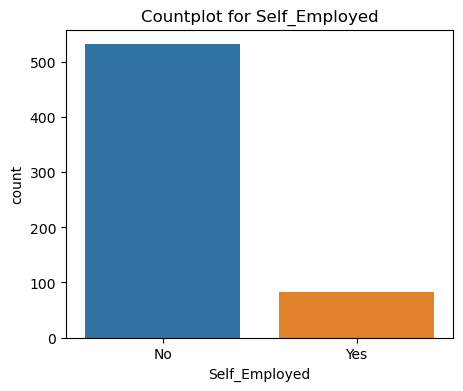

In [21]:
plt.figure(figsize = (5,4))
sns.countplot(x=ls['Self_Employed'])
plt.title('Countplot for Self_Employed')
plt.show()

self employed applicants are lesser here

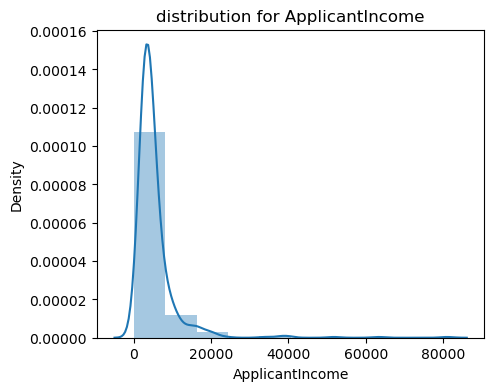

In [22]:
plt.figure(figsize = (5,4))
sns.distplot(ls['ApplicantIncome'],bins = 10)
plt.title('distribution for ApplicantIncome')
plt.show()

here in ApplicantIncome column slightly right skewed distribution showing

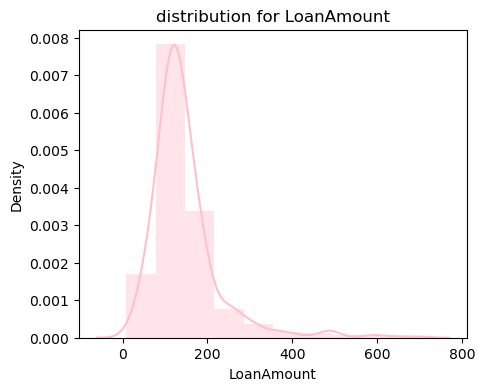

In [23]:
plt.figure(figsize = (5,4))
sns.distplot(ls['LoanAmount'],color='pink',bins=10)
plt.title('distribution for LoanAmount')
plt.show()

here the average loan amount is 149 which shows slightly right skewed distribution

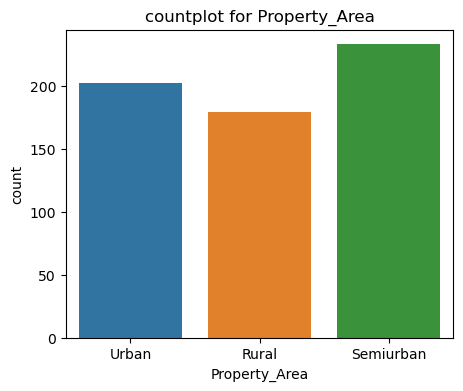

In [24]:
plt.figure(figsize = (5,4))
sns.countplot(x=ls['Property_Area'])
plt.title('countplot for Property_Area')
plt.show()

Semiurban and urban applicants are higher than rural applicants

# Bivariate Analysis

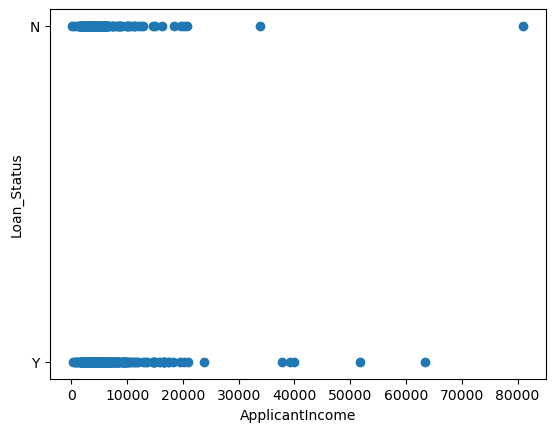

In [25]:
plt.scatter(ls['ApplicantIncome'],ls['Loan_Status'])
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan_Status')
plt.show()

if applicants income is higher then the chances of getting loan is higher

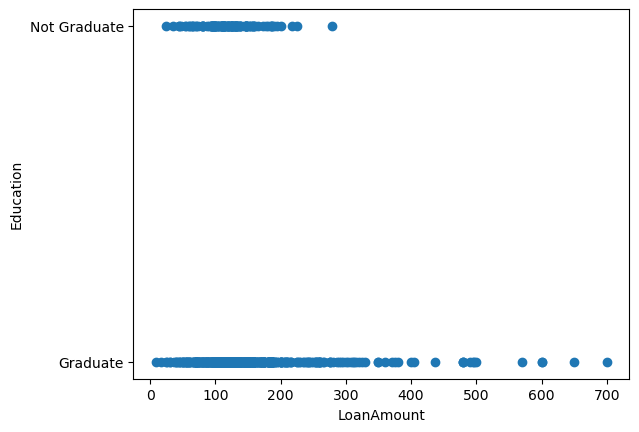

In [26]:
plt.scatter(ls['LoanAmount'],ls['Education'])
plt.xlabel('LoanAmount')
plt.ylabel('Education')
plt.show()

here we can see applicants having graduation are more eligible for getting loan than non graduated applicants

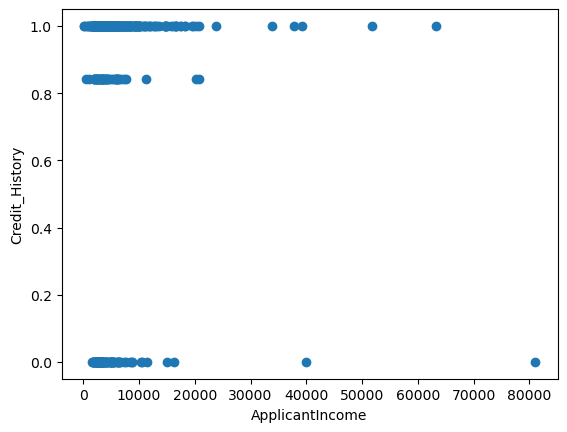

In [27]:
plt.scatter(ls['ApplicantIncome'],ls['Credit_History'])
plt.xlabel('ApplicantIncome')
plt.ylabel('Credit_History')
plt.show()

applicants are having history with loan those applicants have abiity to repay  the amount 

0.0 refers to applicants rejected for loan 

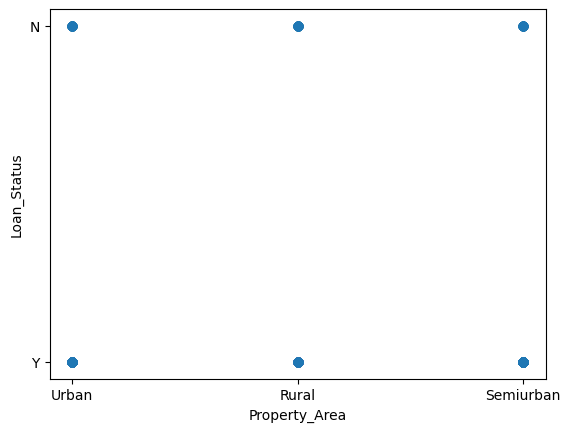

In [28]:
plt.scatter(ls['Property_Area'],ls['Loan_Status'])
plt.xlabel('Property_Area')
plt.ylabel('Loan_Status')
plt.show()

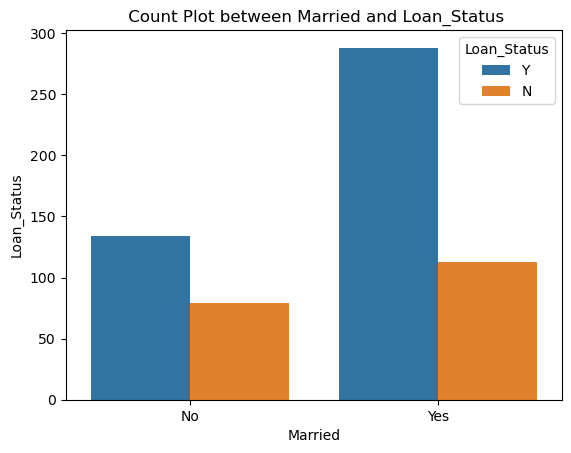

In [29]:
sns.countplot(data=ls, x='Married', hue='Loan_Status')
plt.xlabel('Married')
plt.ylabel('Loan_Status')
plt.title(' Count Plot between Married and Loan_Status')
plt.show()

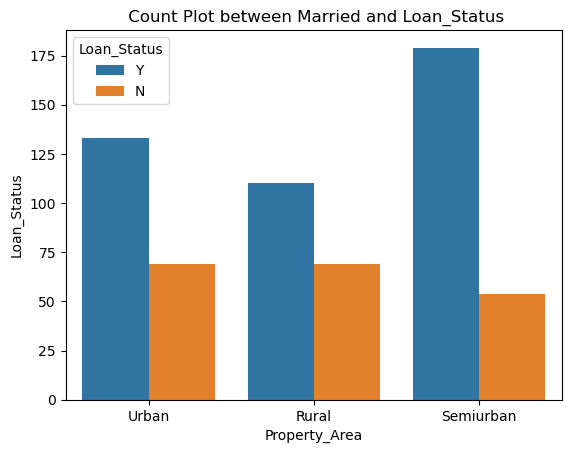

In [30]:
sns.countplot(data=ls, x='Property_Area', hue='Loan_Status')
plt.xlabel('Property_Area')
plt.ylabel('Loan_Status')
plt.title(' Count Plot between Married and Loan_Status')
plt.show()

applicants who live in semiurban and urban area have higher chances to get loan

# Multivariate Analysis

<Figure size 1000x1200 with 0 Axes>

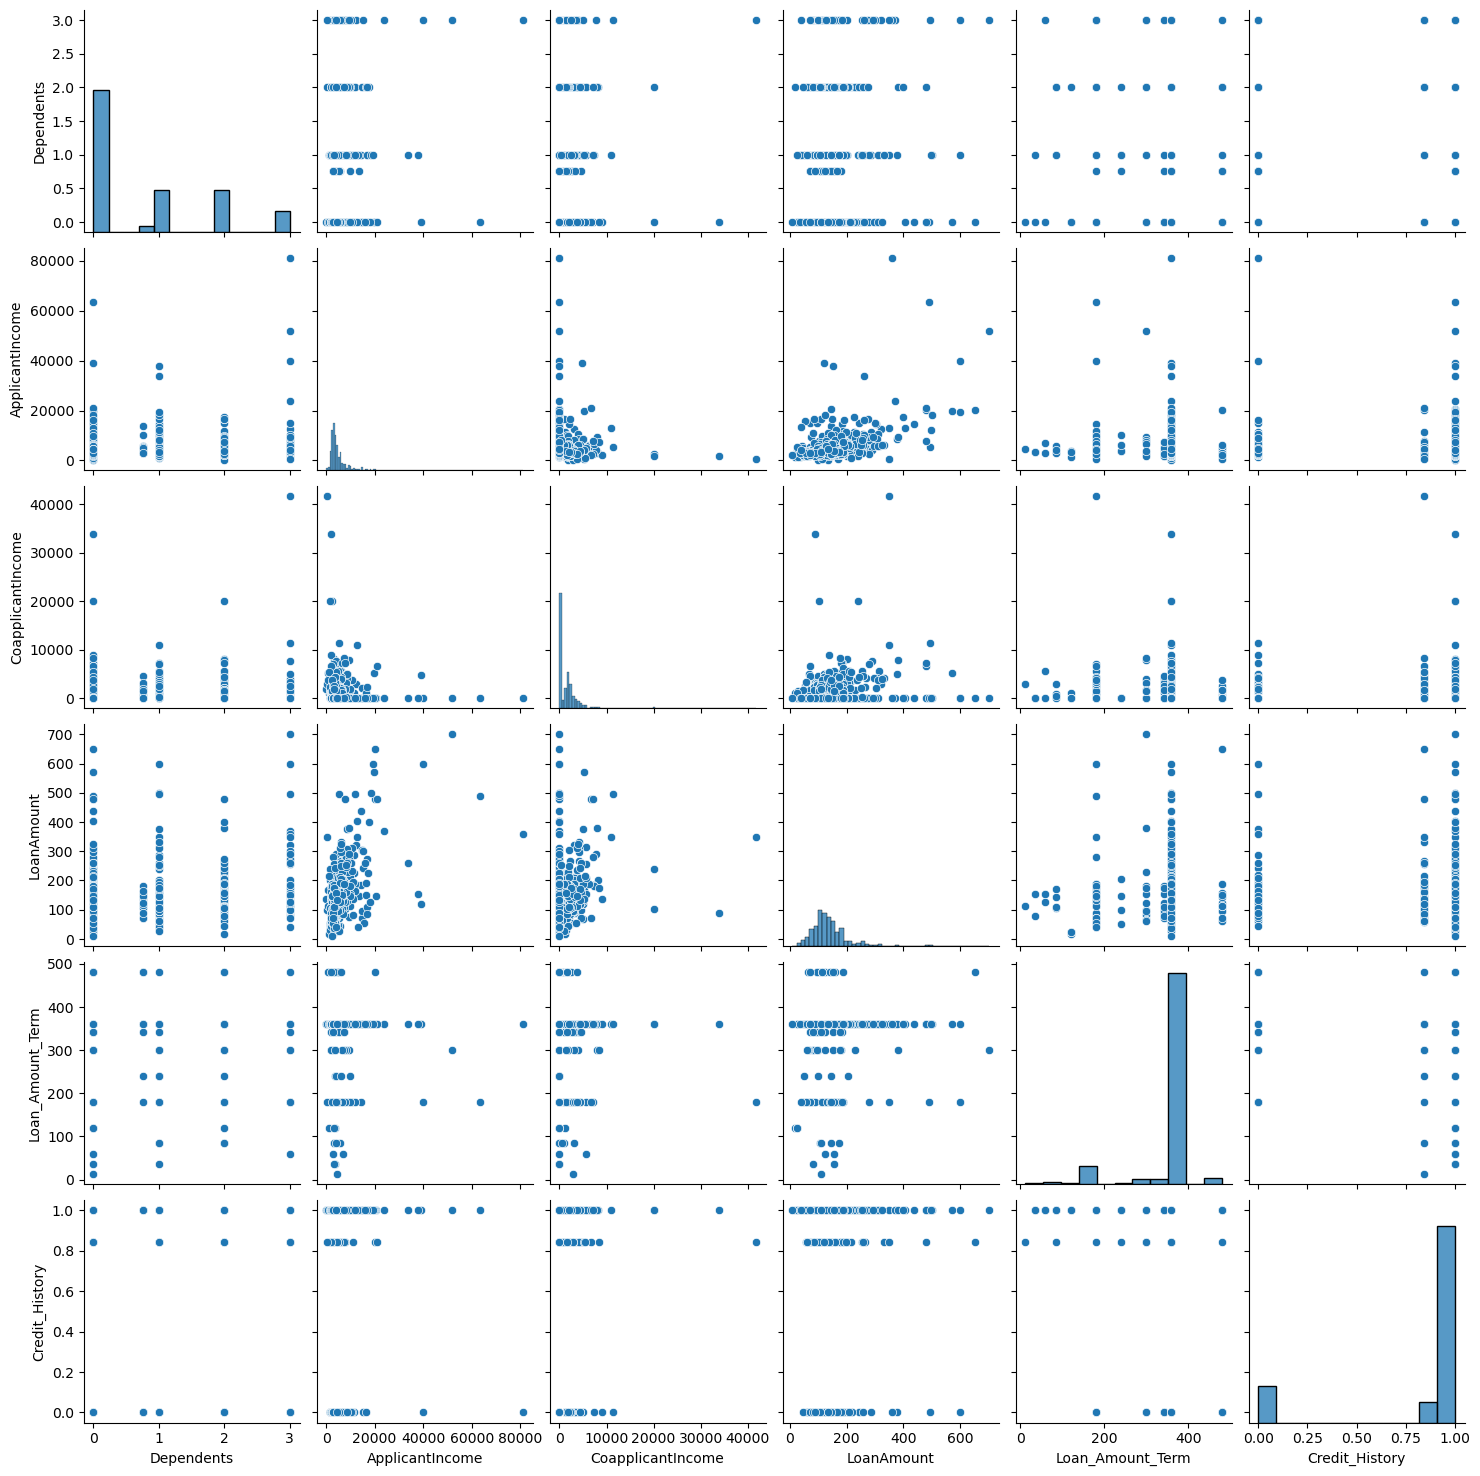

In [31]:
plt.figure(figsize = (10,12))
sns.pairplot(ls)

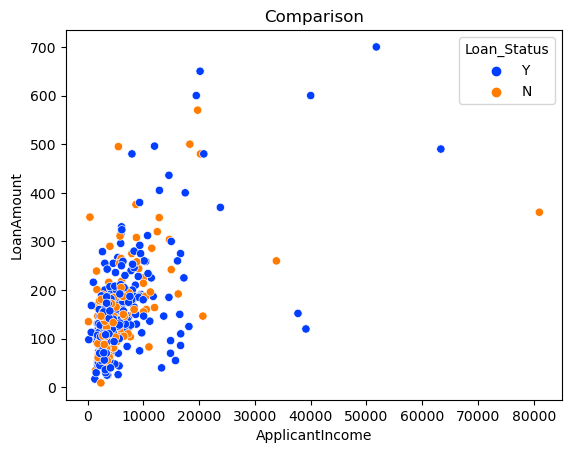

In [32]:
#Scatterplot

plt.title('Comparison')
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data = ls, hue = 'Loan_Status', palette = 'bright')
plt.show()

as income of an applicant raises chances of getting loan increases

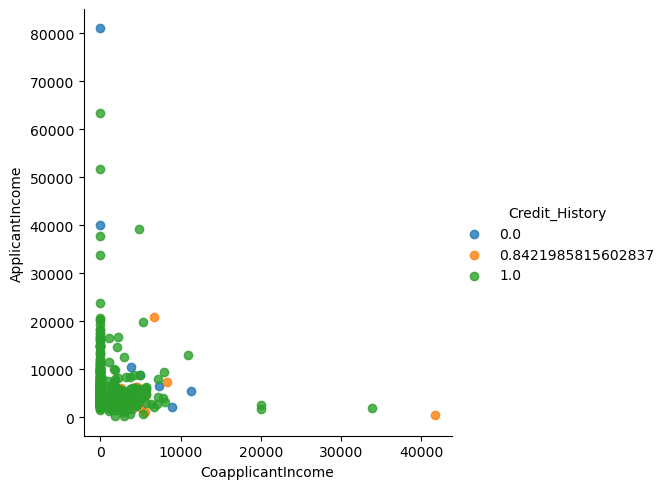

In [33]:
sns.lmplot(x='CoapplicantIncome', y='ApplicantIncome', hue='Credit_History', data=ls , fit_reg=False)



# Encoding Technique

In [34]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
le

LabelEncoder()

In [36]:
ls['Gender'] = le.fit_transform(ls['Gender'])
ls['Married'] = le.fit_transform(ls['Married'])
ls['Education'] = le.fit_transform(ls['Education'])
ls['Self_Employed'] = le.fit_transform(ls['Self_Employed'])
ls['Property_Area'] = le.fit_transform(ls['Property_Area'])
ls['Loan_Status'] = le.fit_transform(ls['Loan_Status'])

In [37]:
ls.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [38]:
ls.dtypes

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# Outliers

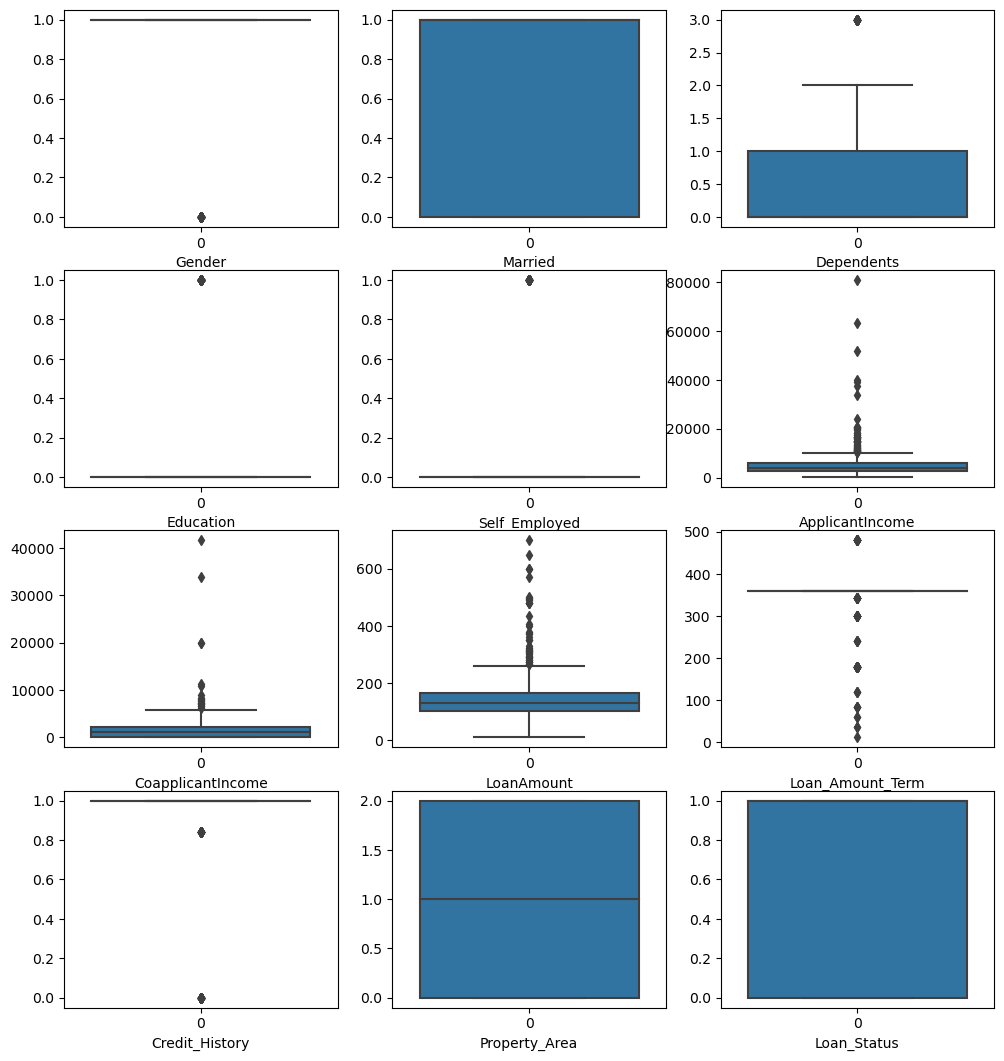

In [39]:
plt.figure(figsize=(12,40))
plot = 1
for col in ls:
    if plot<=15:
        plt.subplot(12,3,plot)
        sns.boxplot(ls[col])
        plt.xlabel(col)
    plot+=1
plt.show()

so there are outliers present in numeric columns and we need to treat them using zscore method

In [40]:
from scipy.stats import zscore

In [41]:
ls1 = ls[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
z = np.abs(zscore(ls1))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.451640
1,0.134412,0.038732,0.219273,0.279851,0.451640
2,0.393747,0.554487,0.957641,0.279851,0.451640
3,0.462062,0.251980,0.314547,0.279851,0.451640
4,0.097728,0.554487,0.064454,0.279851,0.451640
...,...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851,0.451640
610,0.212557,0.554487,1.267279,2.518655,0.451640
611,0.437174,0.472404,1.269371,0.279851,0.451640
612,0.357064,0.554487,0.483367,0.279851,0.451640


In [42]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [43]:
ls1 = ls[(z<3).all(axis=1)]
ls1.shape

(577, 12)

so earlier we had about 614 no of Rows and after treating outliers from numerical columns we have 577 nos of Rows

Now lets check how much data we have lost

In [44]:
print('Loss of Data in percentage',((ls.shape[0]-ls1.shape[0])/ls.shape[0])*100)

Loss of Data in percentage 6.026058631921824


# Skewness

In [45]:
ls.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.990764
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [355]:
ls['CoapplicantIncome'] = np.cbrt(ls['CoapplicantIncome'])
ls['LoanAmount'] = np.cbrt(ls['LoanAmount'])
ls['ApplicantIncome'] = np.cbrt(ls['ApplicantIncome'])
ls['Loan_Amount_Term'] = np.cbrt(ls['Loan_Amount_Term'])
ls['Credit_History'] = np.cbrt(ls['Credit_History'])

In [356]:
ls.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.990764
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      1.292001
CoapplicantIncome   -0.134276
LoanAmount           0.328378
Loan_Amount_Term    -4.112403
Credit_History      -2.019970
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [404]:
ls['CoapplicantIncome'] = np.log(ls['CoapplicantIncome'])
ls['LoanAmount'] = np.log(ls['LoanAmount'])
ls['ApplicantIncome'] = np.log(ls['ApplicantIncome'])
ls['Loan_Amount_Term'] = np.log(ls['Loan_Amount_Term'])
ls['Credit_History'] = np.log(ls['Credit_History'])

In [405]:
ls.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.990764
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.479580
CoapplicantIncome         NaN
LoanAmount          -0.223227
Loan_Amount_Term    -4.868293
Credit_History            NaN
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [46]:
ls['CoapplicantIncome'] = np.sqrt(ls['CoapplicantIncome'])
ls['ApplicantIncome'] = np.sqrt(ls['ApplicantIncome'])
ls['Loan_Amount_Term'] = np.sqrt(ls['Loan_Amount_Term'])
ls['Credit_History'] = np.sqrt(ls['Credit_History'])
ls['LoanAmount'] = np.sqrt(ls['LoanAmount'])


In [47]:
ls.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.990764
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.967286
CoapplicantIncome    0.979561
LoanAmount           1.314162
Loan_Amount_Term    -3.175195
Credit_History      -2.005377
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

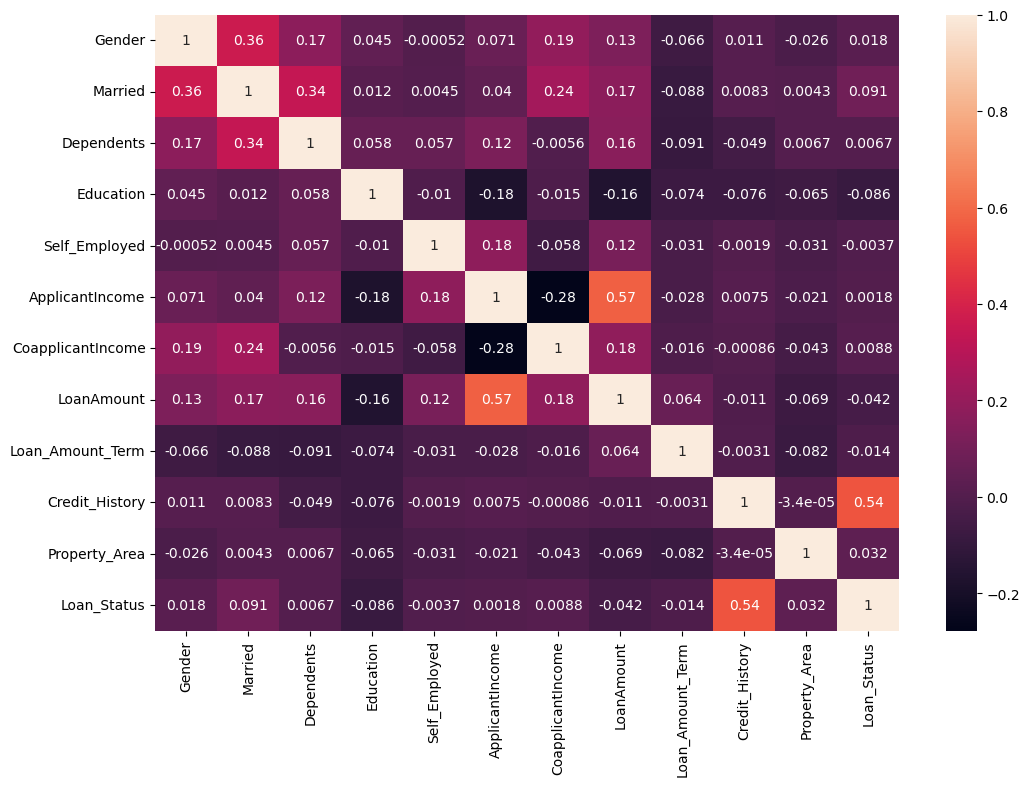

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(ls.corr(),annot= True)
plt.show()

# Splitting data

In [50]:
x = ls.drop('Loan_Status',axis = 1)
y = ls['Loan_Status']

In [51]:
x.shape

(614, 11)

In [52]:
y.shape

(614,)

# Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.761490,-0.528362,-0.392601,0.299200,-0.968111,0.125648,0.284121,0.433284,1.223298
1,0.472343,0.728816,0.236612,-0.528362,-0.392601,-0.029996,0.374245,-0.137054,0.284121,0.433284,-1.318513
2,0.472343,0.728816,-0.761490,-0.528362,2.547117,-0.514577,-0.968111,-1.202609,0.284121,0.433284,1.223298
3,0.472343,0.728816,-0.761490,1.892641,-0.392601,-0.662626,0.710457,-0.257069,0.284121,0.433284,1.223298
4,0.472343,-1.372089,-0.761490,-0.528362,-0.392601,0.335975,-0.968111,0.050234,0.284121,0.433284,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.761490,-0.528362,-0.392601,-0.549090,-0.968111,-1.101684,0.284121,0.433284,-1.318513
610,0.472343,0.728816,2.232816,-0.528362,-0.392601,-0.165701,-0.968111,-1.803752,-2.337198,0.433284,-1.318513
611,0.472343,0.728816,0.236612,-0.528362,-0.392601,0.800275,-0.432594,1.397058,0.284121,0.433284,1.223298
612,0.472343,0.728816,1.234714,-0.528362,-0.392601,0.696657,-0.968111,0.651700,0.284121,0.433284,1.223298


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['ls'] = x.columns
vif

,vif values,ls
0,1.189995,Gender
1,1.335004,Married
2,1.182051,Dependents
3,1.070756,Education
4,1.037499,Self_Employed
5,2.004746,ApplicantIncome
6,1.438735,CoapplicantIncome
7,1.902534,LoanAmount
8,1.044194,Loan_Amount_Term
9,1.009453,Credit_History


In [56]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

as we can see there is imbalance of values in target variable so we have to balance it using oversampling

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [60]:
y1.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

# Building Model

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=42)

In [64]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print('The accuracy for RandomForestClassifier is = ',accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

The accuracy for RandomForestClassifier is =  0.8031496062992126
[[ 98  38]
 [ 12 106]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       136
           1       0.74      0.90      0.81       118

    accuracy                           0.80       254
   macro avg       0.81      0.81      0.80       254
weighted avg       0.82      0.80      0.80       254



In [66]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc = abc.predict(x_test)
print('The accuracy for AdaBoostClassifier is = ',accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

The accuracy for AdaBoostClassifier is =  0.7755905511811023
[[ 94  42]
 [ 15 103]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.77       136
           1       0.71      0.87      0.78       118

    accuracy                           0.78       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.79      0.78      0.77       254



In [67]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print('The accuracy for BaggingClassifier is = ',accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

The accuracy for BaggingClassifier is =  0.7559055118110236
[[95 41]
 [21 97]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       136
           1       0.70      0.82      0.76       118

    accuracy                           0.76       254
   macro avg       0.76      0.76      0.76       254
weighted avg       0.77      0.76      0.76       254



In [68]:
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc = etc.predict(x_test)
print('The accuracy for ExtraTreesClassifier is = ',accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

The accuracy for ExtraTreesClassifier is =  0.7637795275590551
[[99 37]
 [23 95]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       136
           1       0.72      0.81      0.76       118

    accuracy                           0.76       254
   macro avg       0.77      0.77      0.76       254
weighted avg       0.77      0.76      0.76       254



In [69]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc = dtc.predict(x_test)
print('The accuracy for DecisionTreeClassifier is = ',accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))

The accuracy for DecisionTreeClassifier is =  0.7283464566929134
[[100  36]
 [ 33  85]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       136
           1       0.70      0.72      0.71       118

    accuracy                           0.73       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.73      0.73      0.73       254



In [70]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print('The accuracy of KNeighborsClassifier is = ',accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

The accuracy of KNeighborsClassifier is =  0.6889763779527559
[[95 41]
 [38 80]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       136
           1       0.66      0.68      0.67       118

    accuracy                           0.69       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.69      0.69      0.69       254



In [71]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('The accuracy of SVC is = ',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

The accuracy of SVC is =  0.6732283464566929
[[ 67  69]
 [ 14 104]]
              precision    recall  f1-score   support

           0       0.83      0.49      0.62       136
           1       0.60      0.88      0.71       118

    accuracy                           0.67       254
   macro avg       0.71      0.69      0.67       254
weighted avg       0.72      0.67      0.66       254



# Cross Validation Score

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,predrfc)-score.mean())

[0.79674797 0.74796748 0.79674797 0.81300813 0.81147541]
0.7931893909103025
difference in accuracy -0.0018508082331371023


In [75]:
score1 = cross_val_score(abc,x,y)
print(score1)
print(score1.mean())
print('difference in accuracy',accuracy_score(y_test,predabc)-score1.mean())

[0.77235772 0.76422764 0.77235772 0.82113821 0.7704918 ]
0.7801146208183394
difference in accuracy -0.00452406963723706


In [76]:
score2 = cross_val_score(bc,x,y)
print(score2)
print(score2.mean())
print('difference in accuracy',accuracy_score(y_test,predbc)-score2.mean())

[0.74796748 0.70731707 0.7804878  0.7398374  0.7295082 ]
0.7410235905637744
difference in accuracy 0.014881921247249186


In [77]:
score3 = cross_val_score(dtc,x,y)
print(score3)
print(score3.mean())
print('difference in accuracy',accuracy_score(y_test,predtc)-score3.mean())

[0.67479675 0.65853659 0.75609756 0.7398374  0.71311475]
0.7084766093562576
difference in accuracy 0.019869847336655866


In [78]:
score4 = cross_val_score(knn,x,y)
print(score4)
print(score4.mean())
print('difference in accuracy',accuracy_score(y_test,predknn)-score4.mean())

[0.78861789 0.76422764 0.78861789 0.80487805 0.76229508]
0.7817273090763694
difference in accuracy -0.09275093112361354


In [79]:
score5 = cross_val_score(etc,x,y)
print(score5)
print(score5.mean())
print('The difference in accuracy',accuracy_score(y_test,predetc))

[0.76422764 0.7398374  0.76422764 0.76422764 0.7704918 ]
0.7606024256963881
The difference in accuracy 0.7637795275590551


In [80]:
score6 = cross_val_score(svc,x,y)
print(score6)
print(score6.mean())
print('The difference in accuracy',accuracy_score(y_test,predsvc))

[0.81300813 0.78861789 0.7804878  0.83739837 0.81147541]
0.8061975209916034
The difference in accuracy 0.6732283464566929


Random Forest Classifier is the best model because it is giving us best accuracy and least difference in accuracy and cvc

# Hyper parameter tuning

In [81]:
params = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

In [82]:
from sklearn.model_selection import GridSearchCV

In [85]:
Gsrfc = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params, n_jobs=-1, cv=5, scoring='accuracy')
Gsrfc.fit(x_train,y_train)
pred = Gsrfc.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

81.10236220472441


# ROC curve and AUC

In [86]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

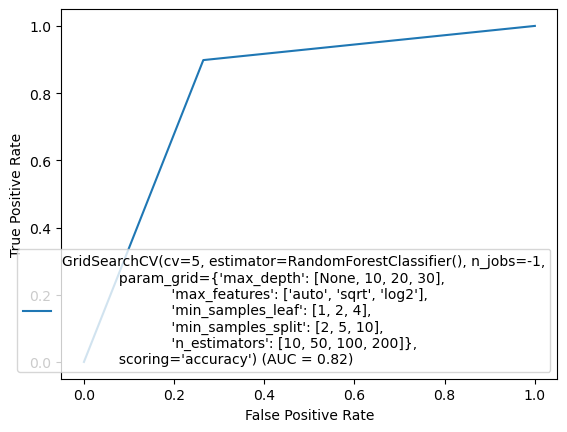

In [87]:
abc_fpr, abc_tpr, threshold = roc_curve(y_test, pred)
auc_ = auc(abc_fpr,abc_tpr)
display = metrics.RocCurveDisplay(fpr = abc_fpr, tpr = abc_tpr, roc_auc = auc_, estimator_name = Gsrfc)
display.plot()

by observing the plot we can say that model is almost perfectly able to distinguish between the classes

# Saving Model
using joblib

In [88]:
import joblib

In [89]:
joblib.dump(Gsrfc,'Loan_status_prediction.pkl')

['Loan_status_prediction.pkl']

Loading model

In [90]:
model = joblib.load('Loan_status_prediction.pkl')
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [91]:
model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [92]:
pred_x = model.predict(x_test)
pred_x

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [94]:
data = pd.DataFrame({'model predicted':pred_x,'original':y_test})
data

,model predicted,original
493,1,1
215,1,1
622,1,0
737,0,0
63,0,0
...,...,...
576,0,0
235,1,1
280,0,0
73,0,0
